In [19]:
from PyPDF2 import PdfReader
reader = PdfReader('inputdata/Banana.pdf')
text = ""
for i in range(0, len(reader.pages)):
    page = reader.pages[i]
    text += page.extract_text() + " "

In [20]:
def display_word_cloud(top_100_words):
  wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(top_100_words))

  plt.figure(figsize=(10, 5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.show()

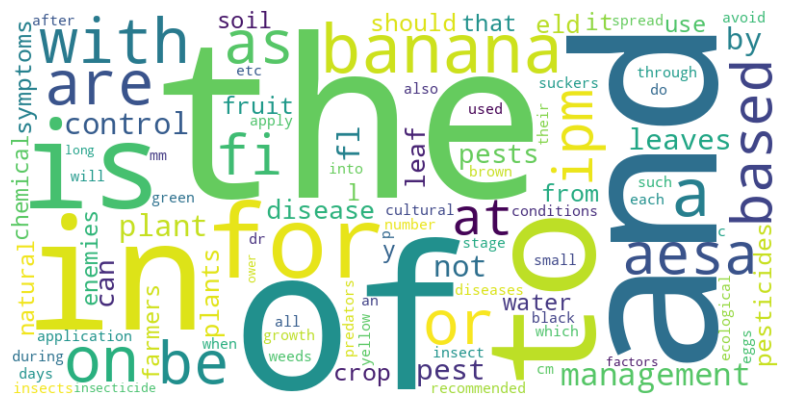

In [21]:
import re
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = re.sub(r'[^a-zA-Z\s]', '', text)
text = text.lower()
words = text.split()
word_counts = Counter(words)
top_100_words = word_counts.most_common(100)

display_word_cloud(top_100_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\avssm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


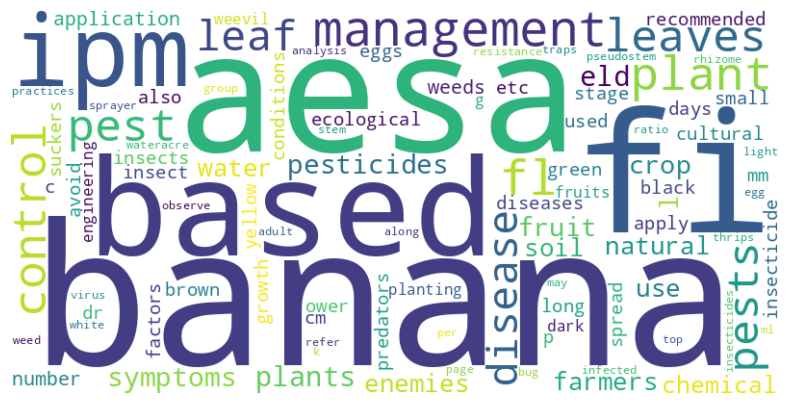

In [22]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

# Filter out stop words from your list of words
filtered_words = [word for word in words if word not in stop_words]
word_counts_filtered = Counter(filtered_words)

# If you still want to limit it to the top 100 words
top_100_words_filtered = word_counts_filtered.most_common(100)

display_word_cloud(top_100_words_filtered)

In [8]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.schema.document import Document

documents = [Document(page_content=text, metadata={"source": "local"})]
text_splitter = RecursiveCharacterTextSplitter(chunk_size=200, chunk_overlap=40)
all_splits = text_splitter.split_documents(documents)

In [1]:
import os
import json
from dotenv import load_dotenv
load_dotenv()
 # accessing and printing value
#print(os.getenv("HF_TOKEN"))

True

In [12]:
from langchain_community.embeddings import HuggingFaceEmbeddings

embedding_model = HuggingFaceEmbeddings(
      model_name="BAAI/bge-small-en-v1.5",
      model_kwargs={'device': 'cpu'},
      encode_kwargs={'normalize_embeddings': False}
  )

OSError: [WinError 127] The specified procedure could not be found. Error loading "c:\Users\avssm\miniconda3\envs\LLM_training\Lib\site-packages\torch\lib\shm.dll" or one of its dependencies.

In [13]:
from langchain_community.embeddings import OllamaEmbeddings
ollama_emb = OllamaEmbeddings(
    model="mxbai-embed-large:latest",
)


In [14]:
from langchain.vectorstores import Chroma

vectordb_paper = Chroma.from_documents(documents=all_splits, embedding=ollama_emb, persist_directory="chroma_db_paper")
retriever_paper = vectordb_paper.as_retriever()

In [15]:
from langchain_community.llms import Ollama
llm = Ollama(model="llama3:latest")

In [16]:
from langchain.chains import RetrievalQA
qa_paper = RetrievalQA.from_chain_type(
    llm,
    chain_type="stuff",
    retriever=retriever_paper,
    verbose=True
)

In [17]:
def rag_manager(qa, query):
    print("\nResult: ", qa.run(query))

In [18]:
rag_manager(qa_paper,"Tell me about the likability index")

C:\Users\avssm\AppData\Local\Temp\ipykernel_20284\199207027.py:2: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use invoke instead.
  print("\nResult: ", qa.run(query))




> Entering new RetrievalQA chain...

> Finished chain.

Result:  According to the given context, the Likability Index is a tool used to evaluate various robots and understand seniors' attitudes towards them. It's designed to identify what specific applications they envision for these robots. The index is also used to survey people living in senior homes, with results showing likability scores to compare different types of robots.
